In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import input_data

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [10]:
g1 = tf.Graph()
with g1.as_default() as graph:
    
    nb_classes = 10
    
    X = tf.compat.v1.placeholder(tf.float32, [None, 784])
    Y = tf.compat.v1.placeholder(tf.float32, [None, nb_classes])
    
    #W = tf.Variable(tf.compat.v1.random_normal([784, nb_classes]), name = 'weight')
    #b = tf.Variable(tf.compat.v1.random_normal([nb_classes]), name = 'bias')
    #hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
    
    W1 = tf.Variable(tf.compat.v1.random_normal([784, 500]), name = 'weight1')
    b1 = tf.Variable(tf.compat.v1.random_normal([500]), name = 'bias1')
    layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
    
    W2 = tf.Variable(tf.compat.v1.random_normal([500, 500]), name = 'weight2')
    b2 = tf.Variable(tf.compat.v1.random_normal([500]), name = 'bias2')
    layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)
    
    W3 = tf.Variable(tf.compat.v1.random_normal([500, nb_classes]), name = 'weight3')
    b3 = tf.Variable(tf.compat.v1.random_normal([nb_classes]), name = 'bias3')
    hypothesis = tf.nn.softmax(tf.matmul(layer2, W3) + b3)
    
    cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.compat.v1.log(hypothesis), axis=1))
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
    
    prediction = tf.argmax(hypothesis, 1)
    is_correct = tf.equal(prediction, tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))    
    
    init_op = tf.compat.v1.global_variables_initializer()
    
    r = random.randint(0, mnist.test.num_examples - 1)
    test = tf.argmax(mnist.test.labels[r:r+1], 1)
    
sess = tf.compat.v1.Session(graph = g1)
sess.run(init_op)

In [11]:
training_epocs = 15
batch_size = 100

for epoch in range(training_epocs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
        avg_cost += c / total_batch
    print('Epoch : ', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
    
print("Accuracy : ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))   

Epoch :  0001 cost =  2.294322946
Epoch :  0002 cost =  0.899892360
Epoch :  0003 cost =  0.653021084
Epoch :  0004 cost =  0.517475580
Epoch :  0005 cost =  0.427045915
Epoch :  0006 cost =  0.363024526
Epoch :  0007 cost =  0.312735828
Epoch :  0008 cost =  0.273355845
Epoch :  0009 cost =  0.240926073
Epoch :  0010 cost =  0.215521629
Epoch :  0011 cost =  0.192873334
Epoch :  0012 cost =  0.173172279
Epoch :  0013 cost =  0.157208894
Epoch :  0014 cost =  0.142987430
Epoch :  0015 cost =  0.130951572
Accuracy :  0.8977


Label :  [5]
Prediction :  [5]


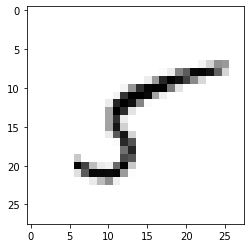

In [9]:
r = random.randint(0, mnist.test.num_examples - 1)
print("Label : ", np.argmax(mnist.test.labels[r:r+1], 1))
print("Prediction : ", sess.run(prediction, feed_dict={X: mnist.test.images[r:r+1]}))

plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()